In [13]:
# Import CSV file
import pandas as pd
import numpy as np
df = pd.read_csv('Consumer_Complaints.csv')

In [24]:
#removes empty narrative rows
rows1 = df.shape
row1 = rows1[0]
df = df[pd.notnull(df['Consumer complaint narrative'])] # ONLY KEEPSROWS WITH NON-NAN VALUES IN COLUMN i
rows2 = df.shape
row2 = rows2[0]
difference = row1 - row2
print("original set had "+str(row1)+" observations")
print(str(difference)+" rows had blank narratives")
print(str(row2)+" observations will be analyzed")
df = df.reset_index(drop=True)

TypeError: notnull() got an unexpected keyword argument 'ignore_index'

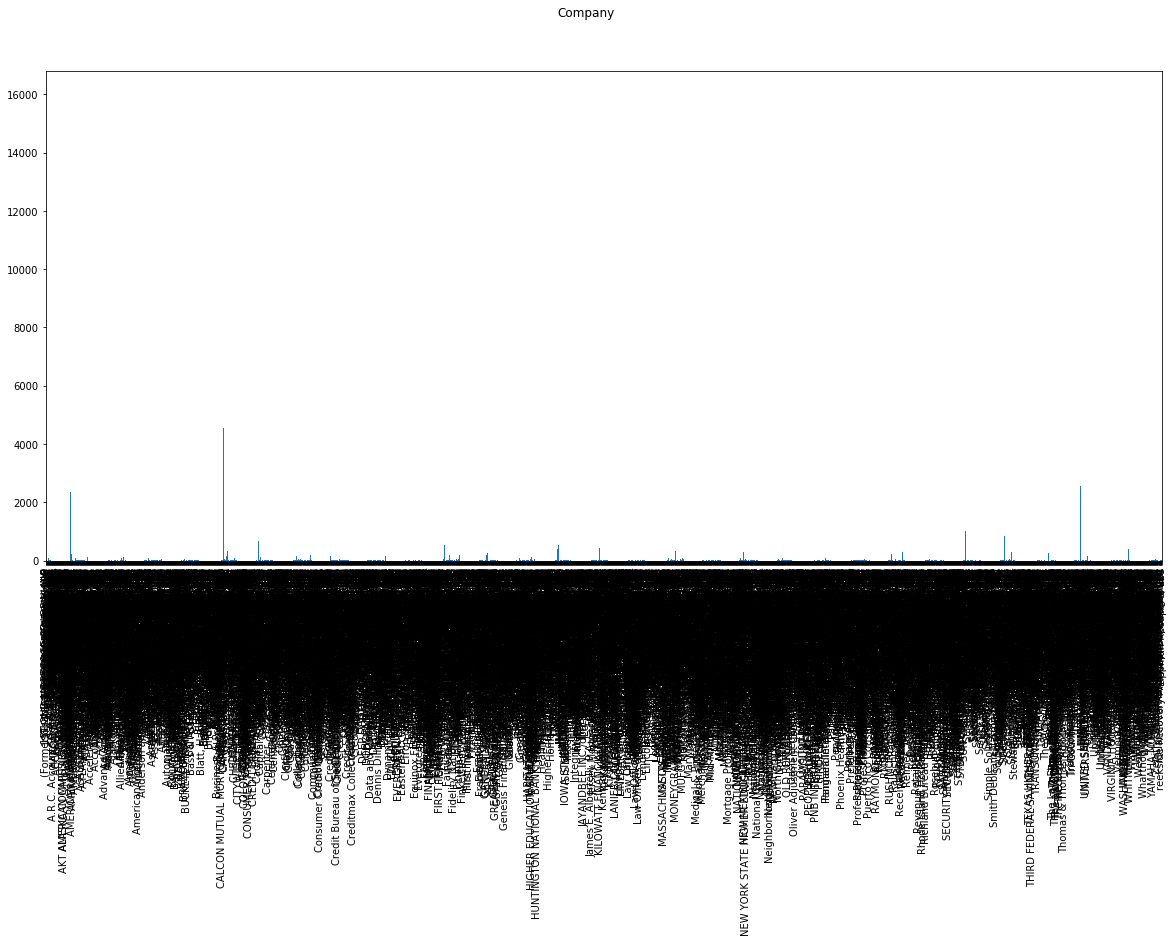

In [3]:
# histogram for companies directly from the file
from collections import Counter, OrderedDict # CALLS COUNTER FUNCTION
from matplotlib import pyplot # IMPORTS GRAPH FUNCTION
string_counts = Counter(df['Company']) # CREATES A LIST THAT COUNTS THE REPETITIONS OF A STRING
string_counts = OrderedDict(string_counts.most_common())
pyplot.figure(1, figsize=(20, 9)) # CREATES A FIGURE WITH THE DIMENSIONS INDICATED
pd.Series(Counter(string_counts)).plot(kind='bar') # CREATES A SERIE FROM THE LIST
pyplot.suptitle('Company') # GIVES THE MAIN TITLE
pyplot.show() # DISPLAYS THE FIGURE

In [4]:
string_counts = Counter(df['Company']) # CREATES A LIST THAT COUNTS THE REPETITIONS OF A STRING
print(str(len(string_counts))+ " companies are listed in the complains")

3318 companies are listed in the complains


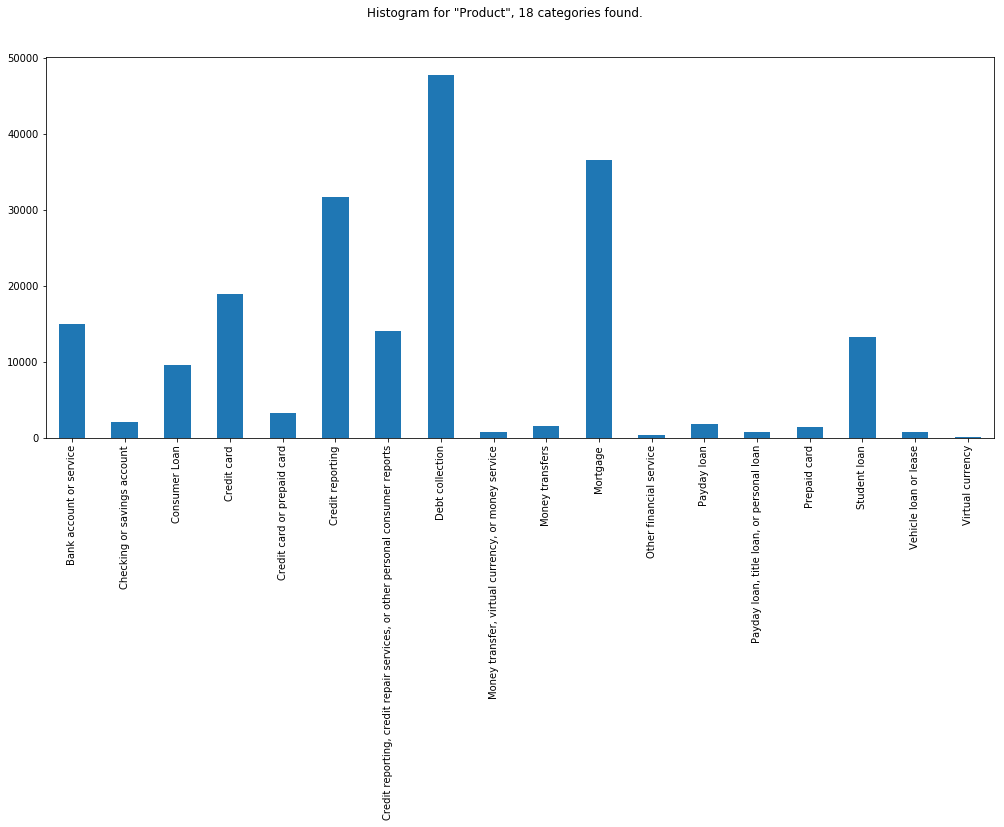

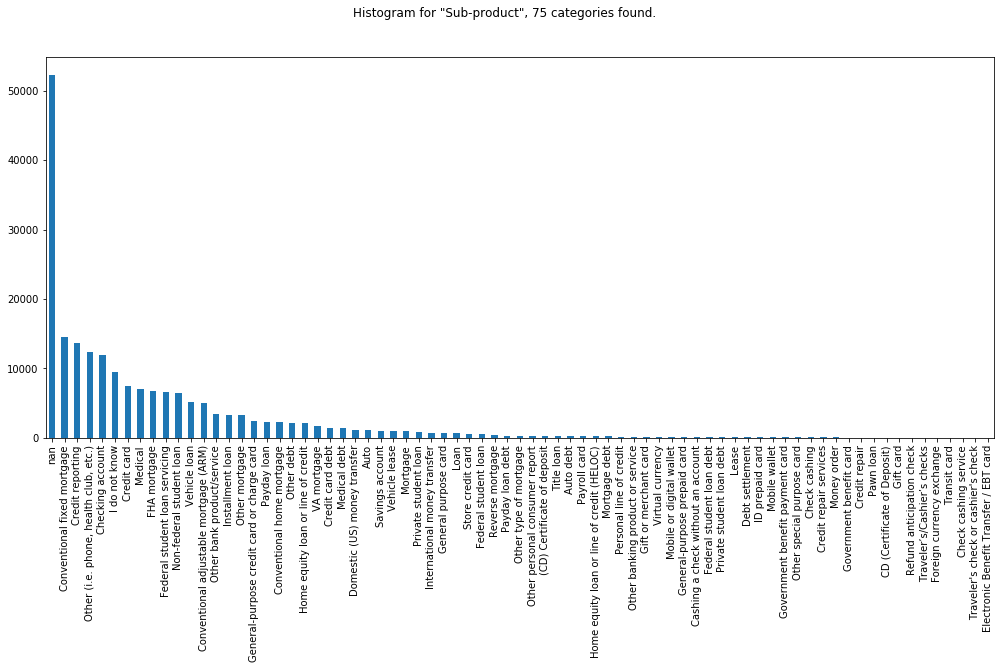

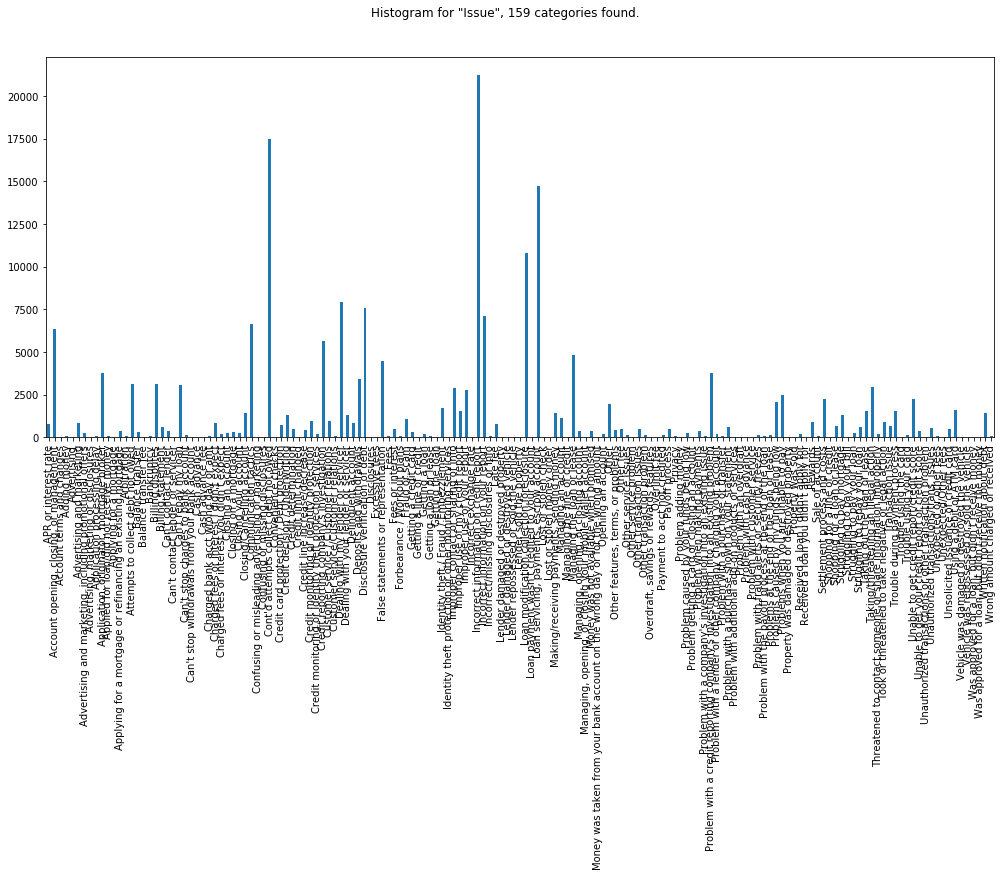

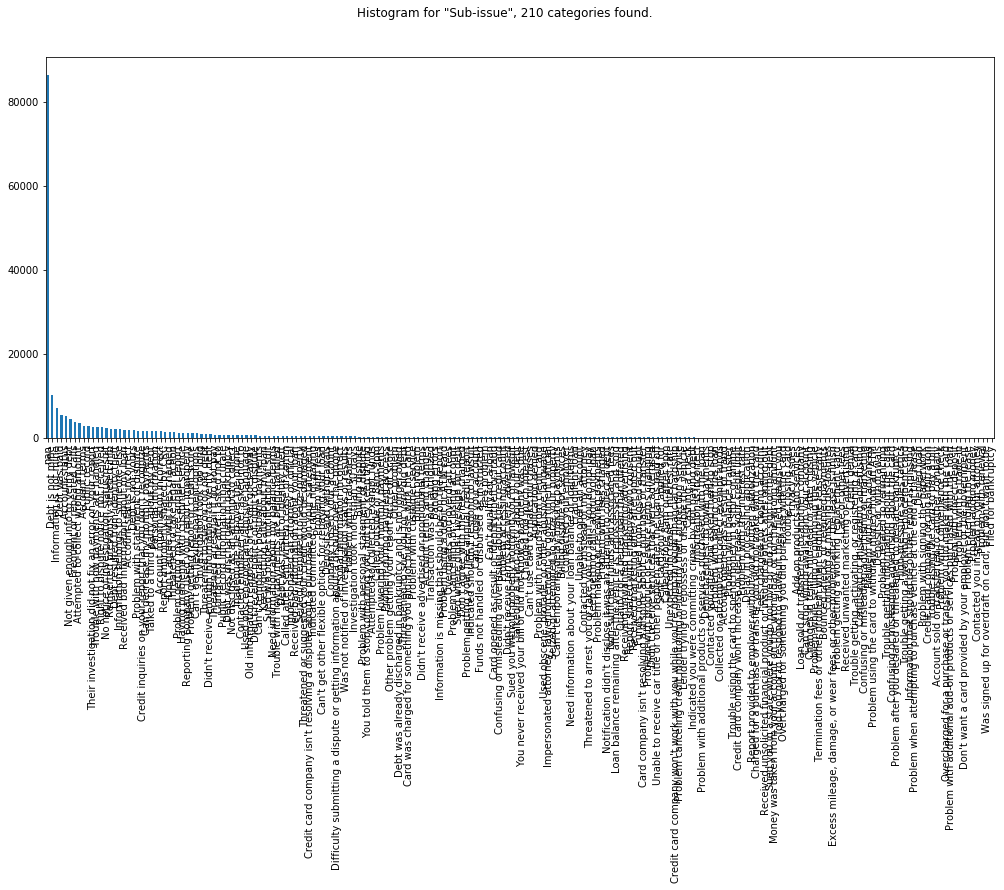

In [5]:
# DATA EXPLORATION FOR RELEVANT CATEGORIES
from collections import Counter, OrderedDict # CALLS COUNTER FUNCTION
from matplotlib import pyplot
categories = ['Product','Sub-product','Issue','Sub-issue']
k = 1
for i in categories:
    string_counts = Counter(df['{0}'.format(i)]) # CREATES A LIST THAT COUNTS THE REPETITIONS OF A STRING
    string_counts = OrderedDict(string_counts.most_common())
    pyplot.figure(k, figsize=(17, 7)) # CREATES A FIGURE WITH THE DIMENSIONS INDICATED
    converted_series=pd.Series(Counter(string_counts)) # CREATES A SERIE FROM THE COUNTER CLASS
    converted_series.plot(kind='bar') # PLOTS THE SERIES INTO BOX PLOT
    pyplot.suptitle('Histogram for "{0}", '.format(i)+str(len(string_counts))+" categories found.") # GIVES THE MAIN TITLE
    pyplot.show() # DISPLAYS THE FIGURE
    k += 1

In [28]:
# df['Consumer complaint narrative'][4]
from nltk import word_tokenize, pos_tag, ne_chunk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
sentence = df['Consumer complaint narrative'][4]
print(sentence)
algo = ne_chunk(pos_tag(word_tokenize(sentence)))
print(algo)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/k/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/k/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/k/nltk_data...
[nltk_data]   Package words is already up-to-date!
This complaint is in regards to Square Two Financial. Refer to CFPB case number XXXX regarding CACH, L. L. C. Square Two Financial has utilized my entire social security number to include date of birth on the pfd document listed with this complaint. The initial complaint was with CACH, L. L. C. and not Square Two Financial. This is in breach of the following : 1. Identity Theft Assumption and Deterrence Act of XXXX 2. Privacy Act of XXXX XXXX. Social Security XXXX 4. XXXX Privacy Act-which carries a maximum XXXX fine for each calendar cap